<div align="center">
  <h1>K-Means Clustering Algorithm</h1>
  <p style="font-size: 14px;">28.10.2024</p>
</div>

---

# Problem 3: K-Means Clustering and Centroid Norm Averaging 

#### **Introduction**
Upon generating **10000** samples from **2D Gaussian Distribution** we want to **cluster** those points into **3** blobs using **K-Means Algorithm**. The goal is to analize how the norm of these centroids changes and empirically estimate the number of iterations needed to get to the **stable 9 digit accuracy**.



In [92]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

# Problem setup
n = 10000
k = 3
R_i = 124

cov = [[1, 0], [0 ,1]]
mean = [1, 1]

point_labels = np.zeros(n)
points = np.random.multivariate_normal(mean, cov, n)

centroids = np.random.multivariate_normal(mean, cov, k) # centroids[0] means label '0' etc.
centroid_history = [[] for i in range(k)]

In [93]:
def determine_label(point):
  label = 0
  distance = np.linalg.norm(point - centroids[0])

  for i in range(1, k):
    new_distance = np.linalg.norm(point - centroids[i])

    if (new_distance < distance):
      label = i
      distance = new_distance
  
  return label

def new_centroid(label):
  filter_out = np.zeros(len(point_labels), dtype=bool)
  
  for i in range(len(point_labels)):
    filter_out[i] = (point_labels[i] == label)

  S: np.ndarray = points[filter_out]
  sigma = np.cumsum(S, axis=0)[-1]
  return sigma / len(S)

In [94]:
for i in tqdm(range(R_i)):
  for p_idx in range(len(points)):
    point = points[p_idx]
    
    point_labels[p_idx] = determine_label(point)

    
  for c_idx in range(len(centroids)):
    centroid_history[c_idx].append(centroids[c_idx].copy())
    centroids[c_idx] = new_centroid(c_idx)

100%|██████████| 124/124 [00:06<00:00, 19.90it/s]


In [95]:
result = []
last_mean = float('inf')
elipson = 1e-9
best_i = R_i

for i in range(R_i):
  norms = []

  for j in range(k):
    centroid = centroid_history[j][i]

    norm = np.linalg.norm(centroid)
    norms.append(norm)
  
  mean = np.mean(norms)

  if abs(mean - last_mean) < elipson and i < best_i:
    best_i = i
  
  last_mean = mean

  result.append(np.mean(norms))

print(best_i)

44


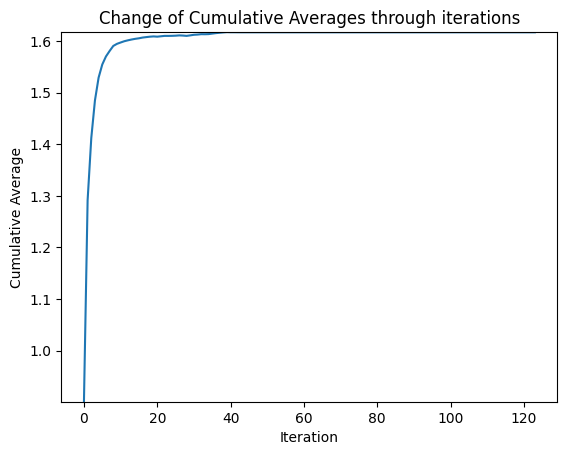

In [96]:
plt.title('Change of Cumulative Averages through iterations')
plt.ylabel('Cumulative Average')
plt.xlabel('Iteration')
plt.ylim(np.min(result), np.max(result))
plt.plot(range(R_i), result)
plt.show()
